# 2023 Outlier Analysis

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
pd.set_option('display.precision', 2)
import seaborn as sns
sns.set()

# import utility functions
import sys
sys.path.append('../')
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [4]:
# load the 2023 data
df = get_data(2023, outlier_method="2023")


Breakdown by Outlier Condition:
	Outlier $0 Rent: 5424 (30%)
	Outlier Rents: 239 ( 1%)
	Outlier Increase vs Previous: 268 ( 1%)
	Overall: 5755 (32%)

Breakdown by Subset:
	5755 outliers (32%)
	12231 non-outliers (68%)


	8567 rent increase (48%)
	9419 no rent increase (52%)


	7146 exempt (40%)
	10840 not exempt (60%)


Most of the outliers are also exempt.

In [5]:
# count exempt and outlier units
pd.crosstab(df["exempt"], df["outlier"], margins=True)

outlier,False,True,All
exempt,,,
False,10190,650,10840
True,2041,5105,7146
All,12231,5755,17986


Summary statistics (including robust statistics such as interquartile range and median absolute deviation)

In [6]:
stats = get_statistics(df)
stats

,mean,std,min,max,1%,5%,25%,75%,95%,99%,median,iqr,lower,upper,mad
column,,,,,,,,,,,,,,,
BaseRent1,926.76,866.32,0.00,2.30e+04,0.0,0.0,0.0,1470.00,2200.00,3000.00,1050.00,1470.00,-2205.00,3675.00,650.00
CurrentRent1,1183.58,11959.75,0.00,1.60e+06,0.0,0.0,0.0,1640.75,2495.00,3500.00,1208.00,1640.75,-2461.12,4101.88,587.00
PreviousRent,1004.18,1478.38,0.00,1.64e+05,0.0,0.0,0.0,1520.00,2288.00,3000.00,1125.00,1520.00,-2280.00,3800.00,575.00
BankedRent1,126.69,1204.31,-2057.00,8.84e+04,0.0,0.0,0.0,17.18,317.47,2000.00,0.00,17.18,-25.77,42.95,0.00
Rent_Inc,179.40,11990.75,-162126.23,1.60e+06,-652.7,0.0,0.0,94.00,250.00,2350.00,0.00,94.00,-141.00,235.00,0.00
Rent_Inc_base,256.82,11934.83,-20500.00,1.60e+06,-1000.0,0.0,0.0,130.00,1283.00,2500.00,35.50,130.00,-195.00,325.00,35.50
Rent_Inc_base_percent,23.89,1240.15,-100.00,9.99e+04,-100.0,0.0,0.0,10.00,25.02,60.30,6.25,10.00,-15.00,25.00,4.62
Rent_Inc,179.40,11990.75,-162126.23,1.60e+06,-652.7,0.0,0.0,94.00,250.00,2350.00,0.00,94.00,-141.00,235.00,0.00
Rent_Inc_per_BedRms,83.21,3060.50,-81063.12,4.00e+05,-350.0,0.0,0.0,65.00,176.00,1313.15,0.00,65.00,-97.50,162.50,0.00


Note that we know there are a lot of $0 rents, which we assume should be removed from the analysis. Thus, it may be worthwhile to look at an alternative set of statistics:

In [7]:
stats_no_0 = get_statistics(df[~df["outlier_0_rent"]])
stats_no_0

,mean,std,min,max,1%,5%,25%,75%,95%,99%,median,iqr,lower,upper,mad
column,,,,,,,,,,,,,,,
BaseRent1,1306.30,750.11,0.00,2.30e+04,0.00,0.0,980.00,1600.00,2400.00,3500.00,1295.00,620.00,50.00,2530.00,305.00
CurrentRent1,1694.63,14280.55,0.54,1.60e+06,263.42,827.1,1175.00,1800.00,2600.00,3805.46,1470.00,625.00,237.50,2737.50,320.00
PreviousRent,1420.70,1589.52,0.00,1.64e+05,0.00,500.0,1065.81,1700.00,2482.00,3419.50,1350.00,634.19,114.53,2651.28,300.00
BankedRent1,172.45,1369.51,-2057.00,8.84e+04,0.00,0.0,0.00,63.00,548.05,2450.00,0.00,63.00,-94.50,157.50,0.00
Rent_Inc,273.93,14345.95,-162126.23,1.60e+06,-75.00,0.0,0.00,116.00,489.65,2615.60,65.00,116.00,-174.00,290.00,65.00
Rent_Inc_base,388.33,14277.82,-20500.00,1.60e+06,-200.00,0.0,3.50,180.00,1650.00,2800.00,96.00,176.50,-261.25,444.75,84.00
Rent_Inc_base_percent,25.82,1249.68,-99.97,9.99e+04,-14.29,0.0,0.00,10.00,25.47,61.63,6.44,10.00,-15.00,25.00,4.60
Rent_Inc,273.93,14345.95,-162126.23,1.60e+06,-75.00,0.0,0.00,116.00,489.65,2615.60,65.00,116.00,-174.00,290.00,65.00
Rent_Inc_per_BedRms,131.01,3659.25,-81063.12,4.00e+05,-50.00,0.0,0.00,86.90,274.92,1585.93,42.50,86.90,-130.36,217.26,42.50


<AxesSubplot:xlabel='CurrentRent1', ylabel='Count'>

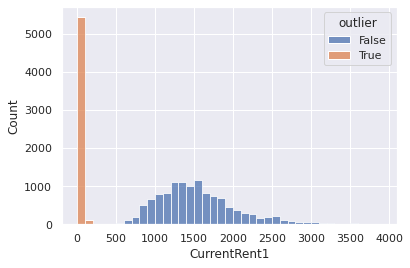

In [8]:
sns.histplot(df, x="CurrentRent1", hue="outlier", multiple="stack", bins=[100*i for i in range(0, 40)])

<AxesSubplot:xlabel='Rent_Inc_percent', ylabel='Count'>

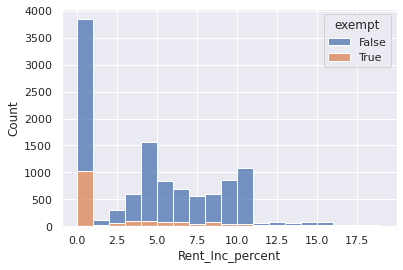

In [9]:
sns.histplot(df, x="Rent_Inc_percent", hue="exempt", multiple="stack", bins=range(0,20))